In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/supplement-sales-data/Supplement_Sales_Weekly_Expanded.csv


dataset: https://www.kaggle.com/datasets/zahidmughal2343/supplement-sales-data

In [53]:
df = pd.read_csv("/kaggle/input/supplement-sales-data/Supplement_Sales_Weekly_Expanded.csv")
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [54]:
df["Date"]=pd.to_datetime(df["Date"])
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [55]:
df.duplicated().sum()

0

In [56]:
df.isnull().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4384 non-null   datetime64[ns]
 1   Product Name    4384 non-null   object        
 2   Category        4384 non-null   object        
 3   Units Sold      4384 non-null   int64         
 4   Price           4384 non-null   float64       
 5   Revenue         4384 non-null   float64       
 6   Discount        4384 non-null   float64       
 7   Units Returned  4384 non-null   int64         
 8   Location        4384 non-null   object        
 9   Platform        4384 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 342.6+ KB


In [58]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,4384,2022-08-18 12:00:00,2020-01-06 00:00:00,2021-04-26 00:00:00,2022-08-18 12:00:00,2023-12-11 00:00:00,2025-03-31 00:00:00,NaN
Units Sold,4384.0,150.200274,103.0,142.0,150.0,158.0,194.0,12.396099
Price,4384.0,34.781229,10.0,22.5975,34.72,46.7125,59.97,14.198309
Revenue,4384.0,5226.569446,1284.0,3349.3725,5173.14,7009.96,10761.85,2192.491946
Discount,4384.0,0.124398,0.0,0.06,0.12,0.19,0.25,0.071792
Units Returned,4384.0,1.531478,0.0,1.0,1.0,2.0,8.0,1.258479


In [59]:
df.describe(include="object").T

,count,unique,top,freq
Product Name,4384,16,Whey Protein,274
Category,4384,10,Vitamin,822
Location,4384,3,Canada,1507
Platform,4384,3,iHerb,1499


In [60]:
df.nunique()

Date               274
Product Name        16
Category            10
Units Sold          81
Price             2919
Revenue           4326
Discount            26
Units Returned       9
Location             3
Platform             3
dtype: int64

In [61]:
df["Location"].unique()

array(['Canada', 'UK', 'USA'], dtype=object)

In [62]:
df["Category"].unique()

array(['Protein', 'Vitamin', 'Omega', 'Performance', 'Amino Acid',
       'Mineral', 'Herbal', 'Sleep Aid', 'Fat Burner', 'Hydration'],
      dtype=object)

In [63]:
daily_sales = df.groupby("Date").agg({
    "Revenue":"sum",
    "Units Sold":"sum",
     "Units Returned":"sum"
})
daily_sales

,Revenue,Units Sold,Units Returned
Date,,,
2020-01-06,71848.56,2406,19
2020-01-13,72416.18,2374,27
2020-01-20,76152.42,2370,26
2020-01-27,70306.73,2397,29
2020-02-03,98011.64,2384,34
...,...,...,...
2025-03-03,66065.44,2431,36
2025-03-10,92509.57,2411,30
2025-03-17,65590.53,2381,22


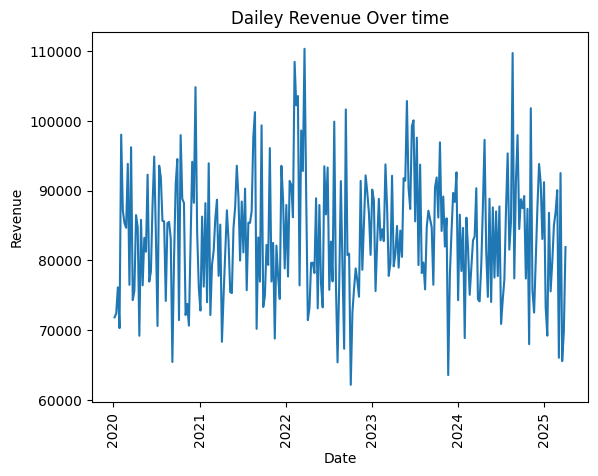

In [64]:
sns.lineplot(x="Date", y ="Revenue", data=daily_sales)
plt.title("Dailey Revenue Over time")
plt.xticks(rotation=90)
plt.show()

# Revenue By Category

In [65]:
category_revenue = df.groupby("Category")["Revenue"].sum().sort_values(ascending= False)

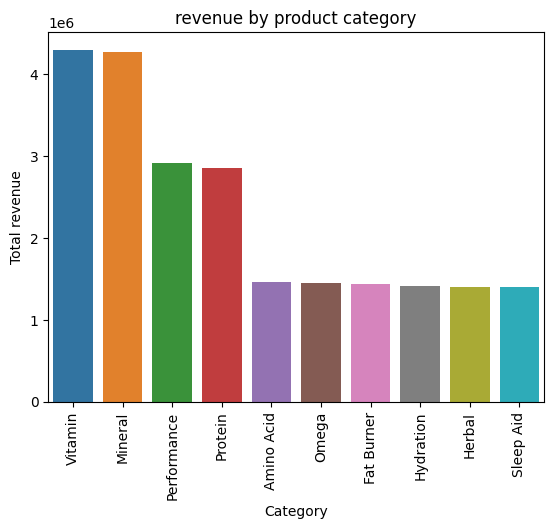

In [66]:
sns.barplot(x = category_revenue.index, y = category_revenue.values)
plt.title("revenue by product category")
plt.ylabel("Total revenue")
plt.xticks(rotation = 90)
plt.show()

Vitamin and mineral are generating the most revenues

In [67]:
top_revenue = df.groupby("Product Name")["Revenue"].sum().sort_values(ascending=False)
top_revenue

Product Name
Biotin                1486798.62
Zinc                  1482546.95
Pre-Workout           1477183.78
BCAA                  1464819.63
Fish Oil              1451065.87
Green Tea Extract     1440900.05
Collagen Peptides     1433297.24
Creatine              1432518.40
Iron Supplement       1431582.41
Whey Protein          1422194.85
Vitamin C             1421998.07
Electrolyte Powder    1411951.38
Ashwagandha           1405700.79
Melatonin             1397315.79
Multivitamin          1391427.99
Magnesium             1361978.63
Name: Revenue, dtype: float64

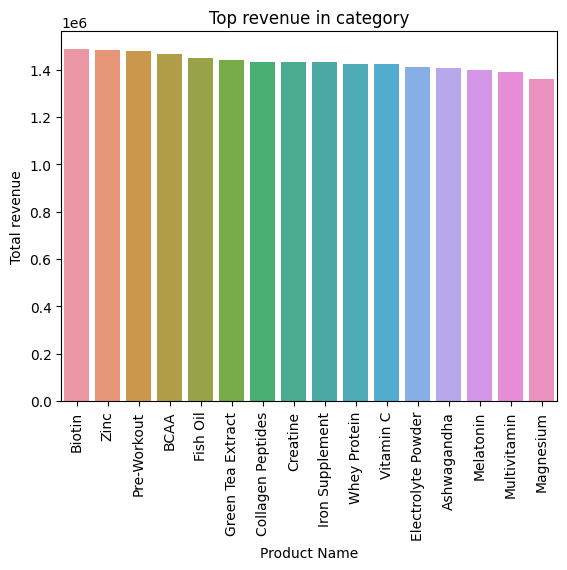

In [68]:
sns.barplot(x = top_revenue.index, y = top_revenue.values)
plt.title("Top revenue in category")
plt.ylabel("Total revenue")
plt.xticks(rotation = 90)
plt.show()

In [69]:
top_products_in_each_category = df.groupby(["Category","Product Name"])["Units Sold"].sum().sort_values(ascending=False)
top_products_in_each_category

Category     Product Name      
Vitamin      Biotin                41533
Herbal       Ashwagandha           41408
Omega        Fish Oil              41325
Performance  Pre-Workout           41287
Mineral      Magnesium             41270
Protein      Whey Protein          41264
Performance  Creatine              41236
Mineral      Zinc                  41204
             Iron Supplement       41194
Vitamin      Multivitamin          41174
Sleep Aid    Melatonin             41165
Hydration    Electrolyte Powder    41065
Amino Acid   BCAA                  41027
Protein      Collagen Peptides     40856
Fat Burner   Green Tea Extract     40743
Vitamin      Vitamin C             40727
Name: Units Sold, dtype: int64

In [70]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


# Visualization by lcation and platform

In [71]:
loc_plat = df.groupby(["Location","Platform"])["Revenue"].sum().unstack().fillna(0)
loc_plat

Platform,Amazon,Walmart,iHerb
Location,,,
Canada,2613844.28,2518639.07,2716096.38
UK,2442671.23,2637066.25,2624222.86
USA,2612936.27,2232862.30,2514941.81


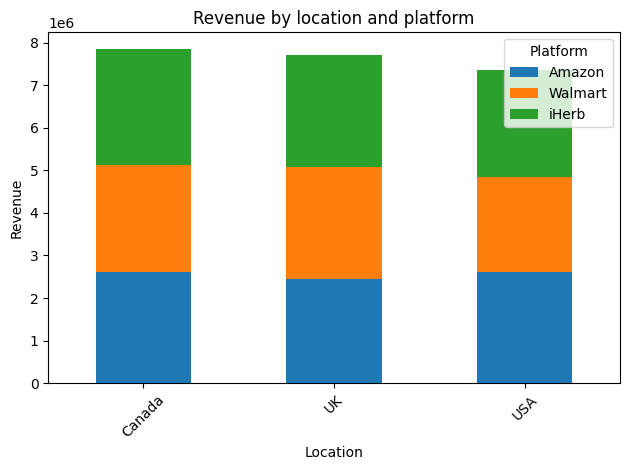

In [72]:
loc_plat.plot(kind = "bar", stacked= True)
plt.title("Revenue by location and platform")
plt.ylabel("Revenue")
plt.xlabel("Location")
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

In [73]:
top_products = df.groupby(["Product Name"])["Revenue"].sum().sort_values(ascending=False).head(10)
top_products

Product Name
Biotin               1486798.62
Zinc                 1482546.95
Pre-Workout          1477183.78
BCAA                 1464819.63
Fish Oil             1451065.87
Green Tea Extract    1440900.05
Collagen Peptides    1433297.24
Creatine             1432518.40
Iron Supplement      1431582.41
Whey Protein         1422194.85
Name: Revenue, dtype: float64

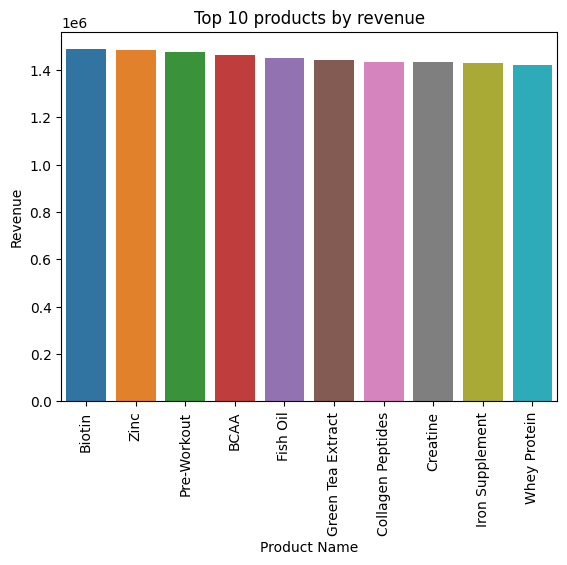

In [74]:
sns.barplot(x= top_products.index, y = top_products.values)
plt.title("Top 10 products by revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.show()

In [75]:
df.columns

Index(['Date', 'Product Name', 'Category', 'Units Sold', 'Price', 'Revenue',
       'Discount', 'Units Returned', 'Location', 'Platform'],
      dtype='object')

In [76]:
df["Unit Return Rate"] = df["Units Returned"]/df["Units Sold"]
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Unit Return Rate
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,0.013986
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,0.000000
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,0.000000
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart,0.000000
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb,0.019108


In [77]:
category_return = df.groupby(["Category"])["Unit Return Rate"].mean().sort_values(ascending= False)
category_return

Category
Hydration      0.010746
Vitamin        0.010475
Amino Acid     0.010355
Fat Burner     0.010229
Performance    0.010207
Protein        0.010203
Mineral        0.010079
Omega          0.009870
Sleep Aid      0.009860
Herbal         0.009433
Name: Unit Return Rate, dtype: float64

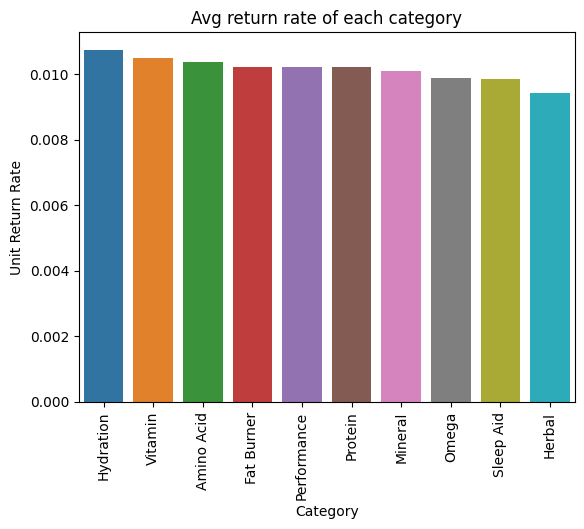

In [78]:
sns.barplot(x=category_return.index, y = category_return.values)
plt.title("Avg return rate of each category")
plt.ylabel("Unit Return Rate")
plt.xticks(rotation=90)
plt.show()

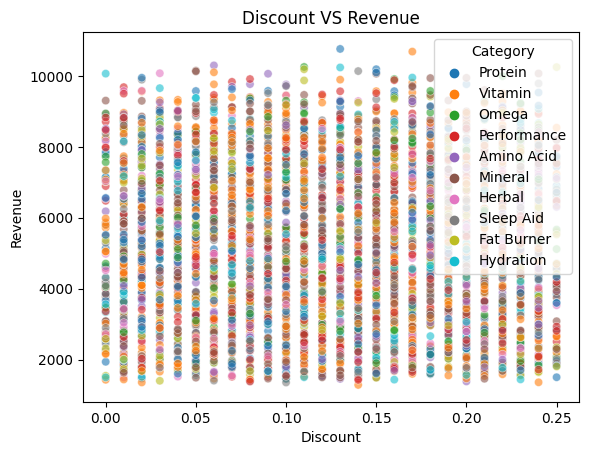

In [79]:
sns.scatterplot(data= df, x="Discount",y="Revenue",hue="Category", alpha =0.6)
plt.title("Discount VS Revenue")
plt.show()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              4384 non-null   datetime64[ns]
 1   Product Name      4384 non-null   object        
 2   Category          4384 non-null   object        
 3   Units Sold        4384 non-null   int64         
 4   Price             4384 non-null   float64       
 5   Revenue           4384 non-null   float64       
 6   Discount          4384 non-null   float64       
 7   Units Returned    4384 non-null   int64         
 8   Location          4384 non-null   object        
 9   Platform          4384 non-null   object        
 10  Unit Return Rate  4384 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 376.9+ KB


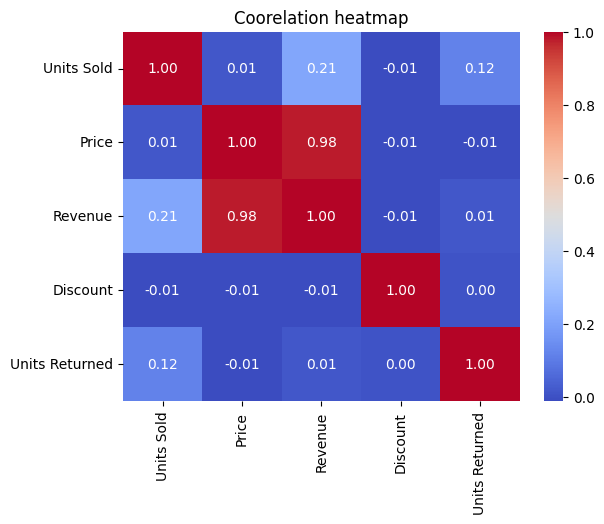

In [82]:
corr = df[["Units Sold","Price","Revenue","Discount","Units Returned"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Coorelation heatmap")
plt.show()

In [84]:
fig = px.line(df, x ="Date", y="Revenue", title="Revenue over time by category")
fig.show()

In [87]:
df["Monthly"] = df["Date"].dt.to_period("M")
monthly = df.groupby("Monthly").agg({
    "Revenue": "sum",
    "Units Sold":"sum",
    "Discount":"mean",
    "Units Returned":"sum"
}).reset_index()

In [88]:
monthly

,Monthly,Revenue,Units Sold,Discount,Units Returned
0,2020-01,290723.89,9547,0.120313,101
1,2020-02,355213.26,9493,0.128125,91
2,2020-03,416547.17,12145,0.111375,123
3,2020-04,326287.92,9605,0.138281,91
4,2020-05,333210.99,9557,0.119375,90
...,...,...,...,...,...
58,2024-11,329894.33,9838,0.117813,106
59,2024-12,446728.99,12042,0.127125,99
60,2025-01,304965.15,9617,0.125156,92
61,2025-02,341768.25,9542,0.128125,103


In [90]:
monthly["Monthly"]= monthly["Monthly"].astype(str)


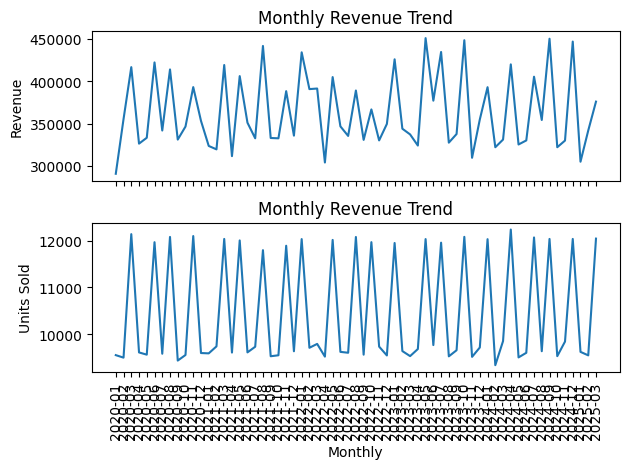

In [102]:
fig, axes =plt.subplots(2,1, sharex=True)
sns.lineplot(data=monthly, x= "Monthly", y="Revenue", ax = axes[0])
axes[0].set_title("Monthly Revenue Trend")
axes[0].tick_params(axis = "x", rotation = 90)

sns.lineplot(data= monthly, x="Monthly", y="Units Sold", ax=axes[1])
axes[1].set_title("Monthly Revenue Trend")
axes[1].tick_params(axis = "x", rotation = 90)

plt.tight_layout()
plt.show()

In [98]:
df["Net Revenue"] = df["Revenue"]- (df["Units Returned"]*df["Price"])

In [99]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Unit Return Rate,Monthly,Net Revenue
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,0.013986,2020-01,4509.18
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,0.000000,2020-01,5908.89
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,0.000000,2020-01,2078.51
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart,0.000000,2020-01,2249.80
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb,0.019108,2020-01,5462.38


In [100]:
category_profit = df.groupby("Category")["Net Revenue"].sum().sort_values(ascending=False)
category_profit

Category
Vitamin        4255337.22
Mineral        4233108.50
Performance    2879997.43
Protein        2827040.48
Amino Acid     1449514.18
Omega          1436916.36
Fat Burner     1426130.43
Hydration      1396778.95
Herbal         1392349.37
Sleep Aid      1383401.64
Name: Net Revenue, dtype: float64

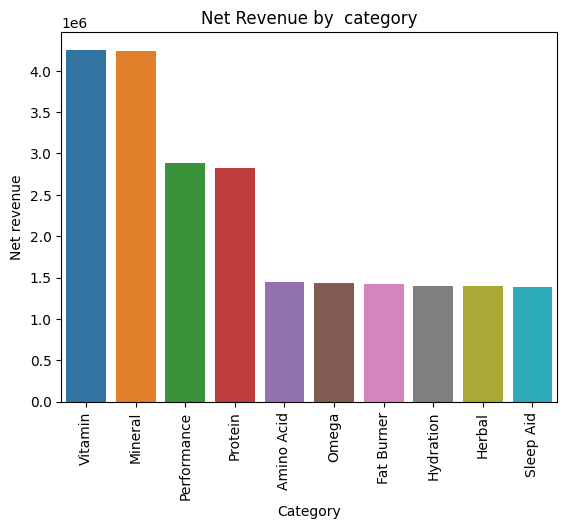

In [103]:
sns.barplot(x = category_profit.index, y = category_profit.values)
plt.title("Net Revenue by  category")
plt.ylabel("Net revenue")
plt.xticks(rotation=90)
plt.show()